##Google Drive and importing libs 

mounting for data files

In [1]:
# Type here current folder for notebook for data
# data files and notebook should be in one folder

PROJECT_FOLDER = '/content/drive/MyDrive/ColabNotebooks/!_python4data/datetime'

def connect_gdrive(PROJECT_FOLDER):
    from google.colab import drive
    import os

    drive.mount('/content/drive')
    os.chdir(PROJECT_FOLDER)
    print('Now current folder is: ', os.getcwd())

connect_gdrive(PROJECT_FOLDER)

Mounted at /content/drive
Now current folder is:  /content/drive/MyDrive/ColabNotebooks/!_python4data/datetime


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plot_styles_list = [
    'seaborn',
    'fivethirtyeight',
    'seaborn-pastel',
    'seaborn-whitegrid',
    'ggplot',
    'grayscale'
]

<ipython-input-2-b1430aed992a>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Normalization (here it is "divide by first value and multiply by 100") 
`normalized = prices.div(first_prices).mul(100)`

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


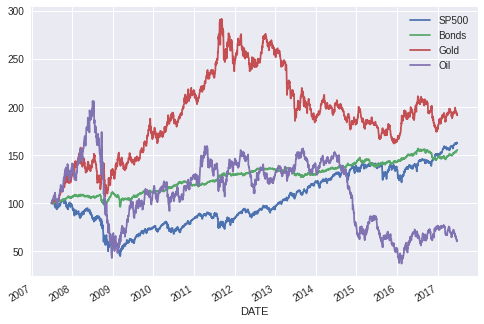

In [ ]:
# Import data here
prices = pd.read_csv('./stock_data/asset_classes.csv', index_col=['DATE'], parse_dates=True)

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()


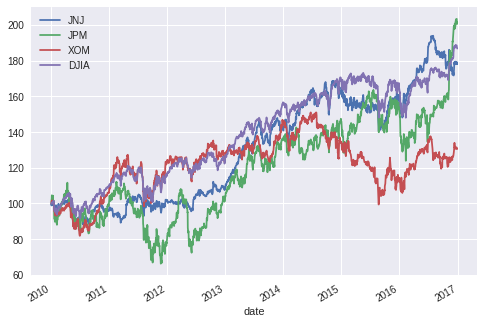

In [ ]:
# Import stock prices and index here
stocks = pd.read_csv('./stock_data/nyse.csv', parse_dates=True,  index_col=['date'])
dow_jones = pd.read_csv('./stock_data/dow_jones.csv', parse_dates=True, index_col=['date'])

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
# print(data.info())

# Normalize and plot your data here

data \
    .div(data.iloc[0, :]) \
    .mul(100) \
    .plot()
plt.show()

<AxesSubplot:xlabel='date'>

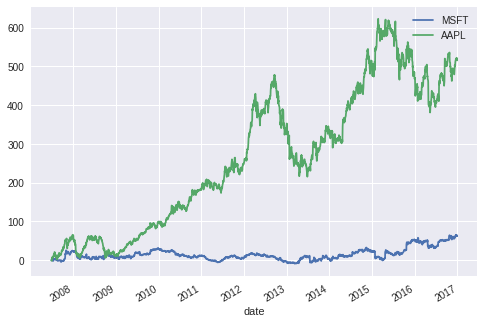

In [ ]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('./stock_data/msft_aapl.csv', parse_dates=True, index_col=['date'])

# Import index here
sp500 = pd.read_csv('./stock_data/sp500.csv', parse_dates=True, index_col=['date'])

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0, :]).mul(100)

# # Subtract the normalized index from the normalized stock prices, and plot the result

normalized[tickers]. \
    sub(normalized['SP500'], axis=0). \
    plot()


### Reindex() dates, asfreq() - to change step of datetime. plus filling empty spaces

In [ ]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates  - Index - here
weekly_dates = pd.date_range(start=start, end=end, freq='W')


# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))



In [ ]:
# # Import data here
# data = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

# # Show first five rows of weekly series
# print(data.asfreq('W').head())

# # Show first five rows of weekly series with bfill option
# print(data.asfreq('W', method='bfill').head())

# # Create weekly series with ffill option and show first five rows
# weekly_ffill = data.asfreq('W', method='ffill')
# print(weekly_ffill.head())

# # Plot weekly_fill starting 2015 here 
# weekly_ffill.loc['2015':].plot()
# plt.show()


### interpolate and ffill

```python
weekly['ffill'] = weekly['UNRATE'].ffill()
weekly['interpolated'] = weekly['UNRATE'].interpolate()

```

## Resample method (like groupby())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


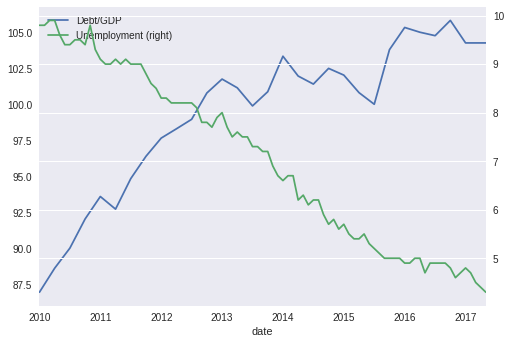

In [ ]:
# Import & inspect data here
data = pd.read_csv('./stock_data/debt_unemployment.csv', 
    parse_dates=['date'], index_col='date'
)
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()


In [ ]:
!ls ./stock_data

5_stocks.csv	       dow_jones.csv   market_cap_series.csv  tickers.csv
apple_google.csv       fb.csv	       msft_aapl.csv	      unrate_2000.csv
asset_classes.csv      gdp_growth.csv  nyse.csv		      unrate.csv
components.csv	       goog_fb.csv     random_walk.csv	      yahoo.csv
debt_unemployment.csv  google.csv      sp500.csv
djia2.csv	       index.csv       stock_data.csv
djia.csv	       listings.xlsx   stocks_4.csv


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


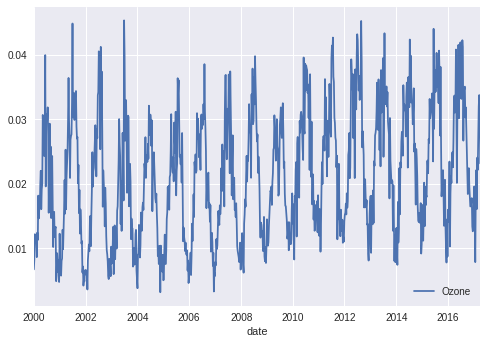

In [ ]:
# Import and inspect data here
ozone = pd.read_csv('./air_quality_data/ozone_nyc.csv', 
    parse_dates=[
        'date'
    ], 
    index_col='date'
)
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()




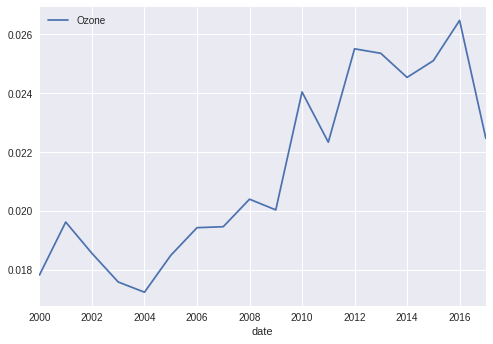

In [ ]:
ozone.resample('A').mean().plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


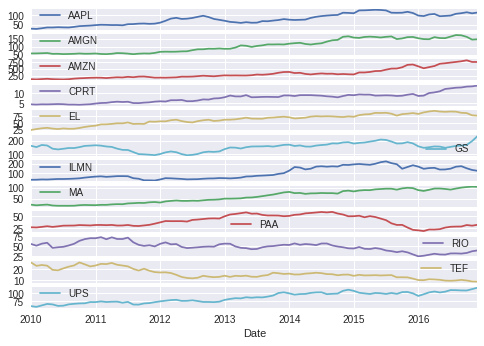

In [ ]:
# Import and inspect data here
stocks = pd.read_csv(
    './stock_data/stocks_4.csv',
    parse_dates=['Date'],
    index_col='Date'
)

print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()

monthly_average.plot(subplots=True)
plt.show()



In [ ]:
!ls ./stock_data

5_stocks.csv	       dow_jones.csv   market_cap_series.csv  tickers.csv
apple_google.csv       fb.csv	       msft_aapl.csv	      unrate_2000.csv
asset_classes.csv      gdp_growth.csv  nyse.csv		      unrate.csv
components.csv	       goog_fb.csv     random_walk.csv	      yahoo.csv
debt_unemployment.csv  google.csv      sp500.csv
djia2.csv	       index.csv       stock_data.csv
djia.csv	       listings.xlsx   stocks_4.csv


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


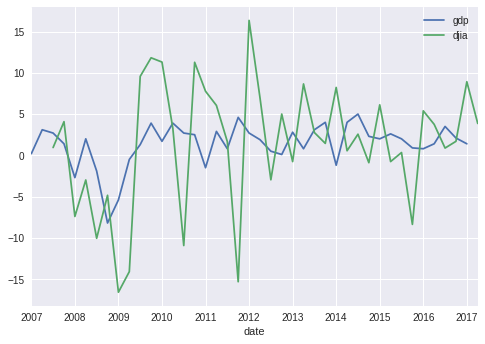

In [ ]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv(
    './stock_data/gdp_growth.csv',
    parse_dates=['date'],
    index_col='date'
)
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv(
    './stock_data/djia.csv', 
    parse_dates=['date'],
    index_col='date'
)
print(djia.info())


# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat(
    [gdp_growth, djia_quarterly_return],
    axis=1
)

data.rename(
    columns={
       'gdp_growth':'gdp'
    }, 
    inplace=True
)

data.plot()
plt.show()

### resample - agg functs - plot

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


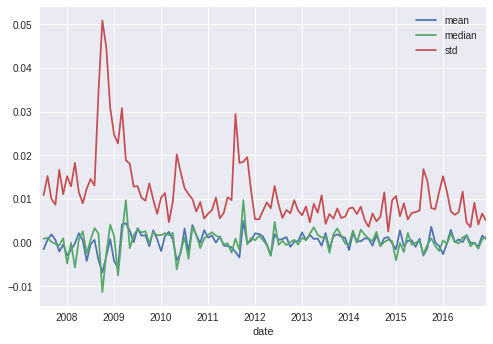

In [ ]:
# Import data here
sp500 = pd.read_csv(
    './stock_data/sp500.csv',
    parse_dates=['date'], 
    index_col='date'
)

print(sp500.info())

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here

stats.plot()
plt.show()



## Rolling window

In [ ]:
data = pd.read_csv('./stock_data/google.csv', parse_dates=['Date'], index_col='Date')
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


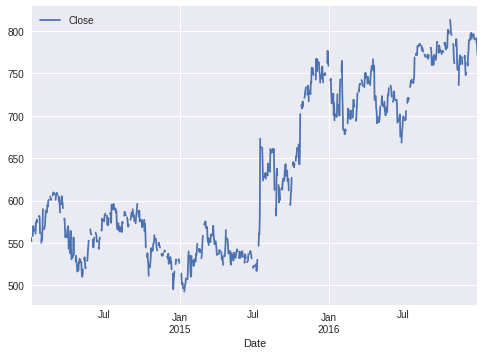

In [ ]:
data.plot()
plt.show()

In [ ]:
data \
    .rolling(window='30D') \
    .mean()

,Close
Date,
2014-01-02,556.000000
2014-01-03,553.975000
2014-01-04,553.975000
2014-01-05,553.975000
2014-01-06,555.350000
...,...
2016-12-26,779.575500
2016-12-27,780.145714
2016-12-28,780.946190


In [ ]:
data \
    .rolling(window=30, min_periods=2) \
    .mean()

,Close
Date,
2014-01-02,NaN
2014-01-03,553.975000
2014-01-04,553.975000
2014-01-05,553.975000
2014-01-06,555.350000
...,...
2016-12-26,779.575500
2016-12-27,780.145714
2016-12-28,780.946190


In [ ]:
!ls ./air_quality_data

co_cities.csv  nyc.csv	ozone_nyc.csv  ozone_nyla.csv


In [ ]:
oz = pd.read_csv('./air_quality_data/ozone_nyc.csv', parse_dates=['date'], 
index_col='date')
print(oz.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


In [ ]:
oz.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [ ]:
len(oz)

6291

In [ ]:
# Calculate 90d and 360d rolling mean for the last price
oz['90D'] = oz['Ozone'].rolling(window='90D').mean()
oz['360D'] = oz['Ozone'].rolling(window='360D').mean()

# Plot data
oz.head()

,Ozone,90D,360D
date,,,
2000-01-01,0.004032,0.004032,0.004032
2000-01-02,0.009486,0.006759,0.006759
2000-01-03,0.005580,0.006366,0.006366
2000-01-04,0.008717,0.006954,0.006954
2000-01-05,0.013754,0.008314,0.008314


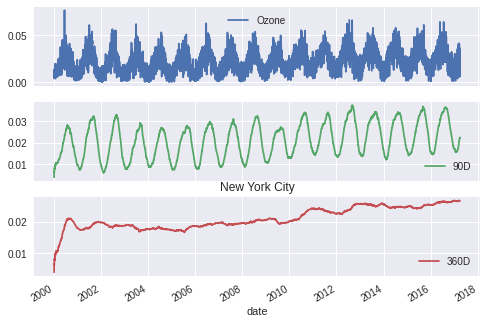

In [ ]:
oz.plot(subplots=True)
plt.title('New York City')
plt.show() 

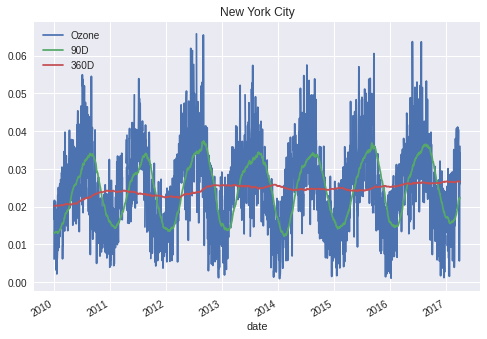

In [ ]:
oz.loc['2010':].plot()
plt.title('New York City')
plt.show()

## Rolling and functions and joining data

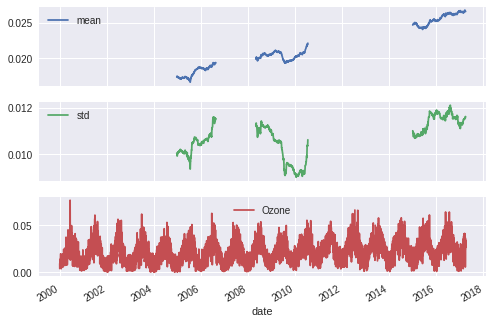

In [ ]:
# data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
# data.dropna(inplace=True)

# Calculate the rolling mean and std here

rolling_stats = data['Ozone'].rolling(window=360).agg(['mean', 'std'])


# Join rolling_stats with ozone data
stats = rolling_stats.join(data)
stats.head()


# Plot stats
stats.plot(subplots=True)
plt.show()

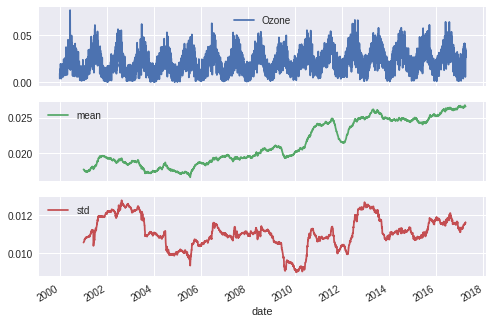

In [ ]:
data = pd.read_csv('./air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
data.dropna(inplace=True)

# Calculate the rolling mean and std here

rolling_stats = data['Ozone'].rolling(window=360).agg(['mean', 'std'])


# Join rolling_stats with ozone data
stats = data.join(rolling_stats)
stats.head()


# Plot stats
stats.plot(subplots=True)
plt.show()

In [ ]:
len(stats)

6167

## Rolling and quantile-s

## Interpolations - for filling missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


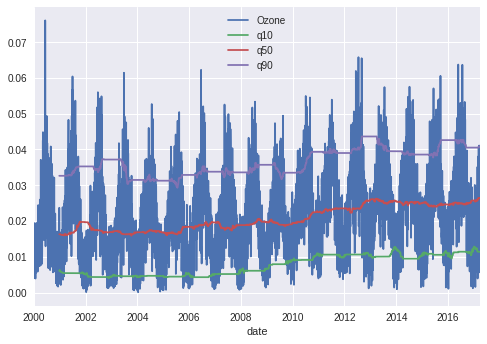

In [ ]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data['Ozone'].rolling(window=360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1).to_frame()

data['q50'] = rolling.quantile(0.5).to_frame()

data['q90'] = rolling.quantile(0.9).to_frame()


# Plot the data
data.plot()
plt.show()



## Differences, first - methods ```data.first() ```

In [ ]:
data.diff()

,Ozone,q10,q50,q90
date,,,,
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,0.005454,NaN,NaN,NaN
2000-01-03,-0.003906,NaN,NaN,NaN
2000-01-04,0.003137,NaN,NaN,NaN
2000-01-05,0.005036,NaN,NaN,NaN
...,...,...,...,...
2017-03-27,-0.025772,-0.000058,-0.000035,0.0
2017-03-28,0.008231,0.000000,-0.000035,0.0
2017-03-29,0.020471,0.000000,0.000000,0.0


In [ ]:
data_oz = data['Ozone'].copy()
data_oz

date
2000-01-01    0.004032
2000-01-02    0.009486
2000-01-03    0.005580
2000-01-04    0.008717
2000-01-05    0.013754
                ...   
2017-03-27    0.005640
2017-03-28    0.013870
2017-03-29    0.034341
2017-03-30    0.026059
2017-03-31    0.035983
Freq: D, Name: Ozone, Length: 6300, dtype: float64

In [ ]:
differences = data_oz.diff()
differences

date
2000-01-01         NaN
2000-01-02    0.005454
2000-01-03   -0.003906
2000-01-04    0.003137
2000-01-05    0.005036
                ...   
2017-03-27   -0.025772
2017-03-28    0.008231
2017-03-29    0.020471
2017-03-30   -0.008282
2017-03-31    0.009925
Freq: D, Name: Ozone, Length: 6300, dtype: float64

In [ ]:
start_price = data_oz.first('D')
start_price

date
2000-01-01    0.004032
Freq: D, Name: Ozone, dtype: float64

In [ ]:
cumulative_sum = start_price.append(differences[1:]).cumsum().to_frame()
cumulative_sum

<ipython-input-39-03426e50d2bd>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_sum = start_price.append(differences[1:]).cumsum().to_frame()


,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754
...,...
2017-03-27,0.005640
2017-03-28,0.013870
2017-03-29,0.034341


In [ ]:
# data_oz = data_oz#.to_frame()
data_oz

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754
...,...
2017-03-27,0.005640
2017-03-28,0.013870
2017-03-29,0.034341


In [ ]:
check = cumulative_sum.join(data_oz, on='date', how='left', lsuffix='_left')
check

# data_oz = data['Ozone'].copy()
# differences = data_oz.diff()

# Select start price
# start_price = data_oz.first('D')

# Calculate cumulative sum
# cumulative_sum = data.expanding().sum()

# cumulative_sum = start_price.append(differences[1:]).cumsum()


# Validate cumulative sum equals data
# print(data_oz.equals(cumulative_sum))


,Ozone_left,Ozone
date,,
2000-01-01,0.004032,0.004032
2000-01-02,0.009486,0.009486
2000-01-03,0.005580,0.005580
2000-01-04,0.008717,0.008717
2000-01-05,0.013754,0.013754
...,...,...
2017-03-27,0.005640,0.005640
2017-03-28,0.013870,0.013870
2017-03-29,0.034341,0.034341


## Expanding - window + sum() (like sumsum)

## .pct_change()

In [ ]:
data['Ozone'].head()

date
2000-01-01    0.004032
2000-01-02    0.009486
2000-01-03    0.005580
2000-01-04    0.008717
2000-01-05    0.013754
Freq: D, Name: Ozone, dtype: float64

In [ ]:
data['Ozone'].pct_change()

date
2000-01-01         NaN
2000-01-02    1.352484
2000-01-03   -0.411782
2000-01-04    0.562293
2000-01-05    0.577719
                ...   
2017-03-27   -0.820456
2017-03-28    1.459378
2017-03-29    1.475862
2017-03-30   -0.241180
2017-03-31    0.380854
Freq: D, Name: Ozone, Length: 6300, dtype: float64

In [ ]:
data['Ozone'].pct_change() - 1

date
2000-01-01         NaN
2000-01-02    0.352484
2000-01-03   -1.411782
2000-01-04   -0.437707
2000-01-05   -0.422281
                ...   
2017-03-27   -1.820456
2017-03-28    0.459378
2017-03-29    0.475862
2017-03-30   -1.241180
2017-03-31   -0.619146
Freq: D, Name: Ozone, Length: 6300, dtype: float64

In [ ]:
!ls ./stock_data

5_stocks.csv	       dow_jones.csv   market_cap_series.csv  tickers.csv
apple_google.csv       fb.csv	       msft_aapl.csv	      unrate_2000.csv
asset_classes.csv      gdp_growth.csv  nyse.csv		      unrate.csv
components.csv	       goog_fb.csv     random_walk.csv	      yahoo.csv
debt_unemployment.csv  google.csv      sp500.csv
djia2.csv	       index.csv       stock_data.csv
djia.csv	       listings.xlsx   stocks_4.csv


In [ ]:
df = pd.read_csv('./stock_data/apple_google.csv', parse_dates=['Date'], index_col='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


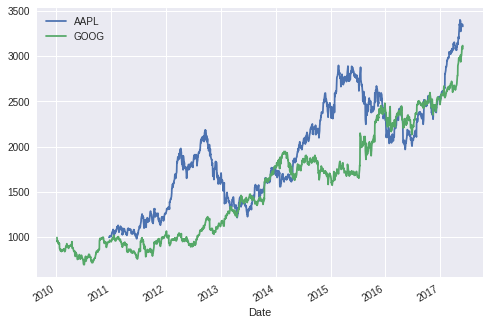

In [ ]:
# Define your investment



investment = 1000

# Calculate the daily returns here
returns = df.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()


## Expanding min and max

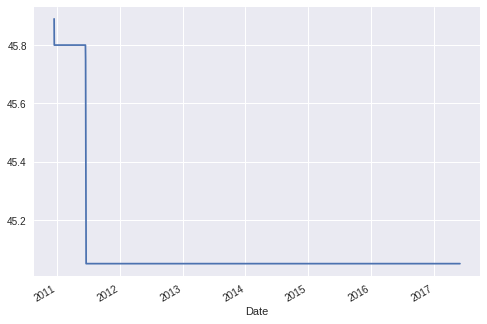

In [ ]:
df.AAPL.expanding().min().plot()
plt.show()

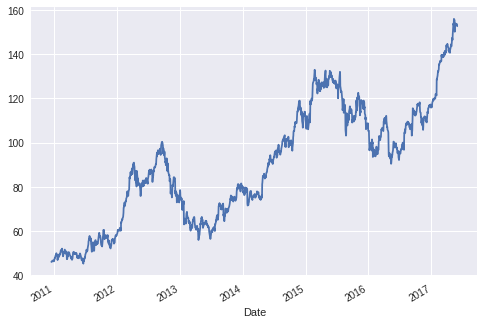

In [ ]:
df.AAPL.plot()
plt.show()

In [ ]:
np.prod([1, 2, 3 , 4, 5])

120

In [ ]:
# help(np.prod)

In [ ]:
from numpy.random import seed, normal

seed(42)

# Create random_walk
random_walk = normal(loc=.001, scale=.01, size=2500)


NameError: ignored

In [ ]:
random_walk = pd.Series(random_walk)

0       0.005967
1      -0.000383
2       0.007477
3       0.016230
4      -0.001342
          ...   
2495    0.009132
2496   -0.001790
2497   -0.001798
2498    0.008904
2499    0.004401
Length: 2500, dtype: float64

In [ ]:
random_walk + 1

0       1.005967
1       0.999617
2       1.007477
3       1.016230
4       0.998658
          ...   
2495    1.009132
2496    0.998210
2497    0.998202
2498    1.008904
2499    1.004401
Length: 2500, dtype: float64

In [ ]:
random_prices = random_walk.add(1).cumsum()

In [ ]:
random_prices

0          1.005967
1          2.005584
2          3.013061
3          4.029292
4          5.027950
           ...     
2495    2499.334384
2496    2500.332594
2497    2501.330797
2498    2502.339701
2499    2503.344101
Length: 2500, dtype: float64

In [ ]:
random_walk.add(1)

0       1.005967
1       0.999617
2       1.007477
3       1.016230
4       0.998658
          ...   
2495    1.009132
2496    0.998210
2497    0.998202
2498    1.008904
2499    1.004401
Length: 2500, dtype: float64

In [ ]:
random_walk.add(1).cumprod()

0        1.005967
1        1.005582
2        1.013101
3        1.029544
4        1.028163
          ...    
2495    24.824558
2496    24.780131
2497    24.735586
2498    24.955825
2499    25.065643
Length: 2500, dtype: float64

In [ ]:
random_prices = random_prices.mul(1000)

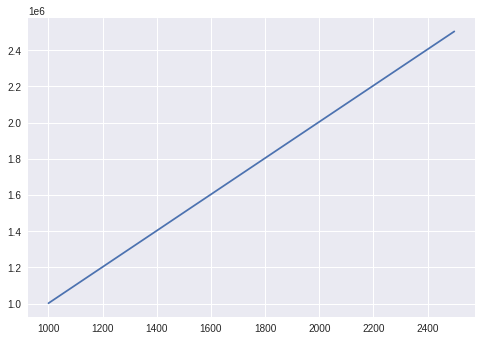

In [ ]:
random_prices.loc[1000:].plot()
plt.show()

In [ ]:
random_walk.add(1)

0       1.005967
1       0.999617
2       1.007477
3       1.016230
4       0.998658
          ...   
2495    1.009132
2496    0.998210
2497    0.998202
2498    1.008904
2499    1.004401
Length: 2500, dtype: float64

## Random Walk in time series

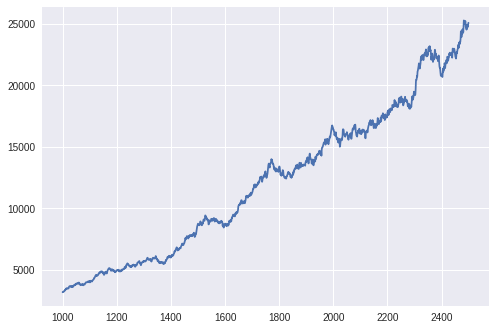

In [ ]:
seed(42)


# Create random_walk
random_walk = normal(loc=.001, scale=.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()
random_prices = random_prices.mul(1000)


# Plot random_prices here

random_prices.loc[1000:].plot()
plt.show()


## Random walk in samples 

In [ ]:
from numpy.random import choice


random_walk = choice(df, size=len(df))

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)


## Plotting correlations in seaborn ```sns.jointplot()``` ```sns.heatmap()```

In [ ]:
df.corr()

sns.heatmap(df.corr(), annot=True)



In [ ]:
listings = pd.read_excel('./stock_data/listings.xlsx')
# listings.info()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
listings.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


In [ ]:
listings.set_index('Stock Symbol', inplace=True)
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


In [ ]:
# Move 'stock symbol' into the index
# listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

listings = listings[listings['IPO Year'] < 2019]

In [ ]:
# Inspect listings
# print(listings.info())

# # Move 'stock symbol' into the index
# listings.set_index('Stock Symbol', inplace=True)

# # Drop rows with missing 'sector' data
# listings.dropna(subset=['Sector'], inplace=True)

# # Select companies with IPO Year before 2019
# listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
# print(listings.info())

# Show the number of companies per sector
print(listings.groupby(['Sector']).size())


Sector
Basic Industries         44
Capital Goods            24
Consumer Durables         4
Consumer Non-Durables    13
Consumer Services        27
Energy                   28
Finance                  12
Health Care              49
Miscellaneous             5
Public Utilities         11
Technology               20
Transportation            1
dtype: int64


In [ ]:
listings.groupby(['Sector']).size().sort_values()

Sector
Transportation            1
Consumer Durables         4
Miscellaneous             5
Public Utilities         11
Finance                  12
Consumer Non-Durables    13
Technology               20
Capital Goods            24
Consumer Services        27
Energy                   28
Basic Industries         44
Health Care              49
dtype: int64

In [ ]:
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components

Sector                 Stock Symbol
Basic Industries       SIM             2.123559e+09
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Consumer Services      GSAT            1.931551e+09
Energy                 MPO             4.794015e+08
Finance                SEB             4.603773e+09
Health Care            CRHM            6.474389e+08
Miscellaneous          AUXO            5.913104e+07
Public Utilities       CQP             1.104692e+10
Technology             MJCO            1.916146e+08
Name: Market Capitalization, dtype: float64

In [ ]:
# listings.groupby(['Sector'])['Market Capitalization'].nlargest(1).sort_values(ascending=False)

# components.sort_values(ascending=False)

# components.index

# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = [   
    'Company Name', 
    'Market Capitalization',
    'Last Sale'
]

print(listings.loc[tickers, info_cols])


Sector                 Stock Symbol
Public Utilities       CQP             1.104692e+10
Finance                SEB             4.603773e+09
Basic Industries       SIM             2.123559e+09
Consumer Services      GSAT            1.931551e+09
Health Care            CRHM            6.474389e+08
Energy                 MPO             4.794015e+08
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Technology             MJCO            1.916146e+08
Miscellaneous          AUXO            5.913104e+07
Name: Market Capitalization, dtype: float64
Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
                                   Company Name  Market Capitalization  \
Stock Symbol                                                             
SIM                   Grupo Simec, S.A. de C.V.           2.123559e+09   
LBY                                Libbey, Inc

In [ ]:
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here

pd.concat(
    [first_value, last_value], 
    axis=1
) \
.sort_values(ascending=False) \
.plot(
    kind='bar'
)

plt.show()


## Useful commands




```python

df = pd.read_csv(
    parse_dates=[''], 
    index_col='Date'
)


df.set_index('col_name')

df.dropna(subset=['col_name'])


df.col_name.add()
           .cumprod()
           .mul() 


df.index.get_level_values('name of index')

df.loc[index_list, columns_list]

```